In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, r2_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
np.set_printoptions(threshold=np.inf)


Load and clean csv

In [370]:
def loadCsv(filename):
    df = pd.read_csv(filename, skipinitialspace=True)
    return df

In [371]:
def cleanCsv(df):
    del df["index"]
    del df["last league"]
    del df["games played"]
    del df["FA cup"]
    df=df.dropna()
    return df

EDA

Data Visualization

In [372]:
def EDA1(data,col_name , title_yLabel):   
    df = data.groupby(["club"]).sum().reset_index()
    df = df.filter(["club", col_name])
    df = df.sort_values(col_name, axis=0, ascending=False)
    df.drop(df.tail(110).index,inplace = True)
    df.plot(kind='bar', x='club', y=col_name , ylabel = title_yLabel)
    

In [373]:
def EDA2(df):
    df_selected_col = df[['club', 'final position' ,'division']].copy()
    df_selected_col = df_selected_col.loc[(df_selected_col['final position'] == 1) & (df_selected_col['division'] == 'First Division')]
    df_selected_col = df_selected_col.groupby(["club"]).sum().reset_index()
    df_selected_col = df_selected_col.sort_values('final position', axis=0, ascending=False)
    df_selected_col.drop(df_selected_col.tail(14).index,inplace = True)
    df_selected_col.plot(kind='bar', x='club', y='final position' , ylabel = 'Titles')

    

In [374]:
def EDA3(df):
    plt.figure(figsize=(20, 7))
    df["home wins"].value_counts().plot(kind="pie")
    plt.title('home wins')
    plt.show()
    df["homeWinsAndGoals"] = df["home wins"] + df["home goals scored"]
    df["awayLossesAndGoals"] = df["away losses"] + df["home losses"]
    plt.figure(figsize=(20, 20))
    sns.heatmap(df.corr(), annot=True)
    plt.title('Heat map correlation for all columns')
    plt.show()

In [375]:
def calc_finalPoints(df):
    y = df["final Points"]
    df["club"] = df["club"].astype("category").cat.codes
    del df["division"]
    X = df[df.columns[df.columns!="final Points"]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=40)
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print ("this value represents the model score: ")
    print (r2_score(y_pred,y_test))

In [376]:
def calc_finalPosition(df):
    df["club"] = df["club"].astype("category").cat.codes
    y = df["final position"]
    del df["division"]
    X = df[df.columns[df.columns!="final position"]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=40)
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print ("this value represents the model score: ")
    print (r2_score(y_pred,y_test))

In [377]:
def calc_awayGoalsConceded(df):
    df["club"] = df["club"].astype("category").cat.codes
    y = df["away goals conceded"]
    del df["division"]
    X = df[df.columns[df.columns!="away goals conceded"]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=40)
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print ("this value represents the model score: ")
    print (r2_score(y_pred,y_test))

In [378]:
def EDA(df):
    EDA1(df.copy(),"final Points","All time points")
    EDA1(df.copy(),"away goals conceded","all time away goals conceded")
    EDA2(df.copy())
    EDA3(df.copy())

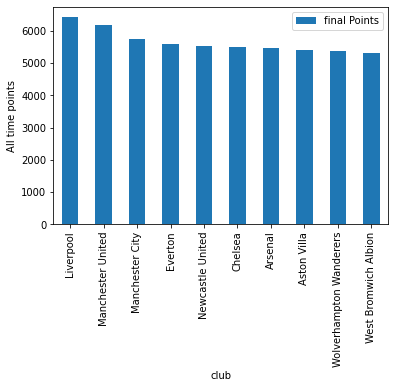

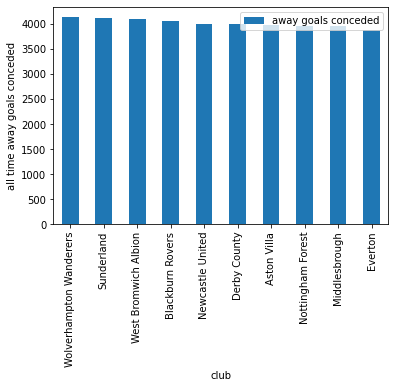

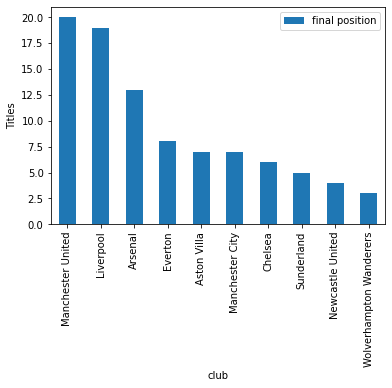

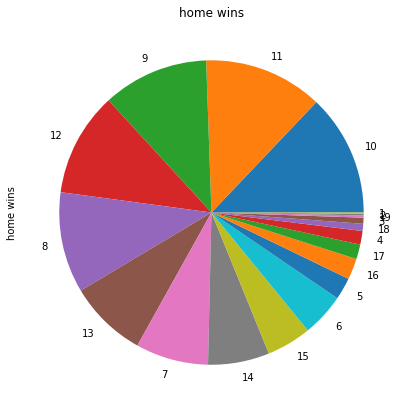

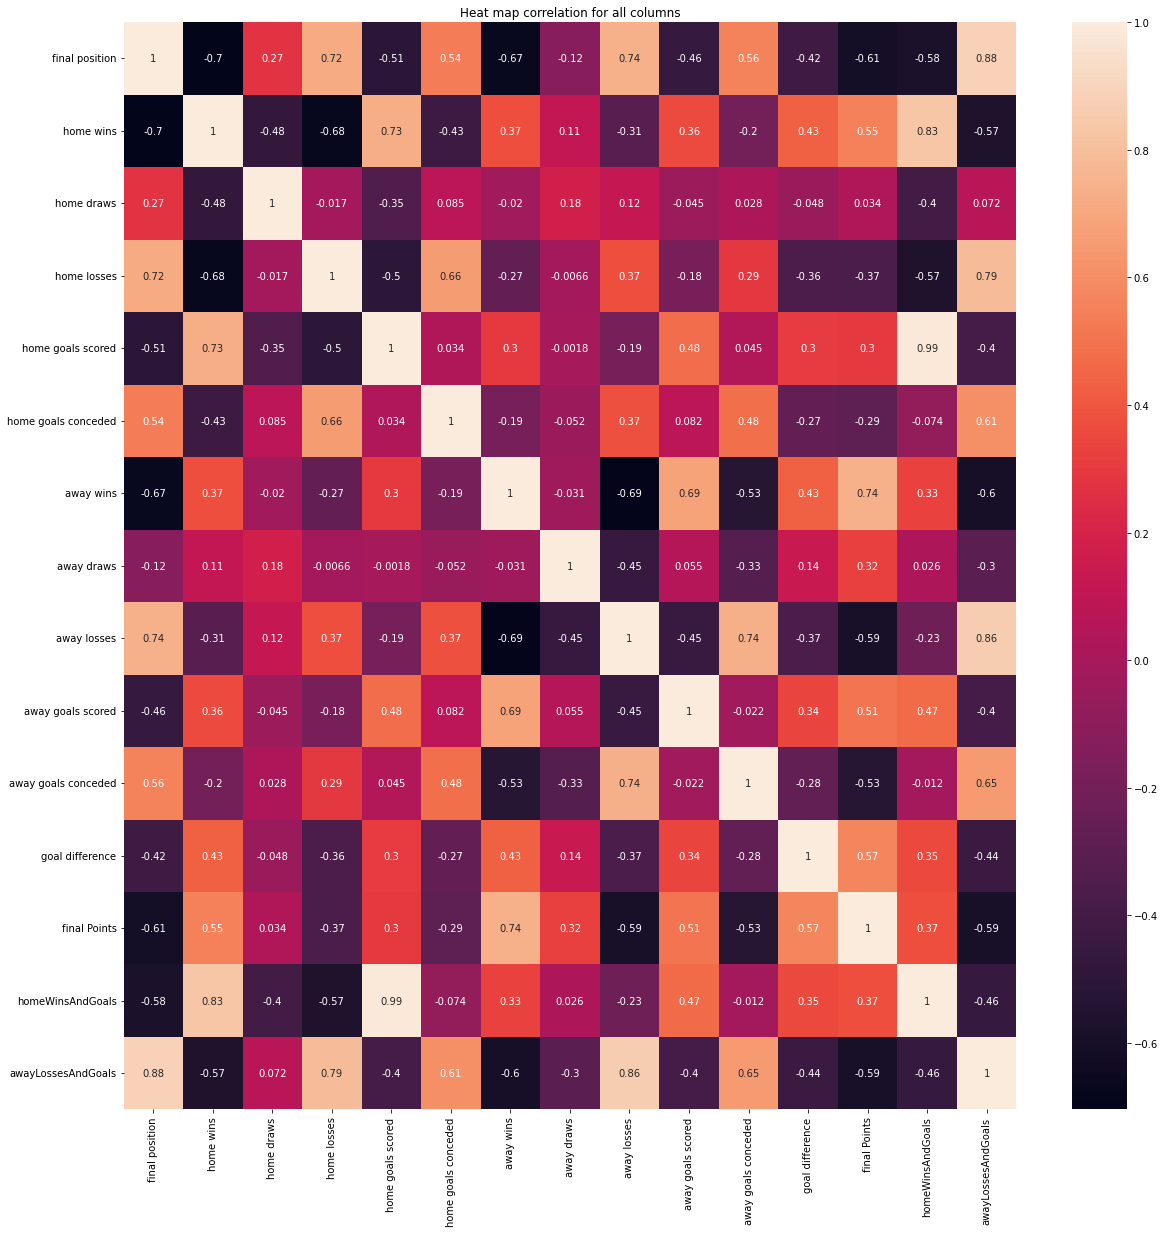

this value represents the model score: 
0.7603837056446889
this value represents the model score: 
0.8653802643417965
this value represents the model score: 
0.704937715939951


In [379]:
df = loadCsv('english_football.csv')
dfAfterClean = cleanCsv(df)
EDA(dfAfterClean)
calc_finalPoints(dfAfterClean.copy())
calc_finalPosition(dfAfterClean.copy())
calc_awayGoalsConceded(dfAfterClean.copy())



